# Lasso Regression

In [10]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import linear_model
import scipy.stats as stats
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

Rozważmy następujący zbiór punktów:

In [11]:
true_fun = lambda X: np.cos(1.5 * np.pi * X)
n_samples=20
x = np.sort(np.random.rand(n_samples))
y = true_fun(x) + np.random.randn(n_samples) * 0.1
x=np.vstack(x)

# Przykład
Proszę wykonać regresję (Ridge Regression) na powyższym zbiorze danych 

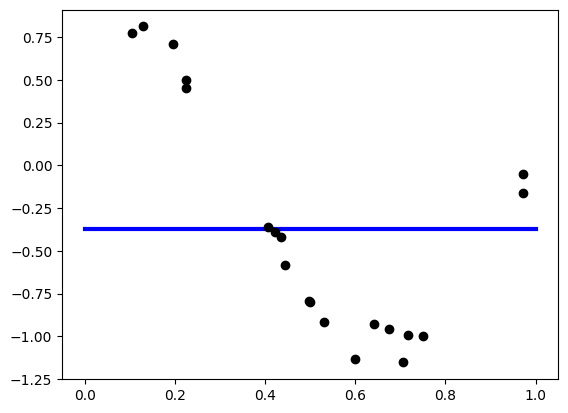

In [12]:
clf = Lasso(alpha=1.0)
clf.fit(x, y) 

x_plot = np.vstack(np.linspace(0, 1, 20))
plt.plot(x_plot, clf.predict(x_plot), color='blue',linewidth=3)
plt.plot(x, y, 'ok');
plt.show()

## Regresja liniowa

LR degree 2
LR degree 20


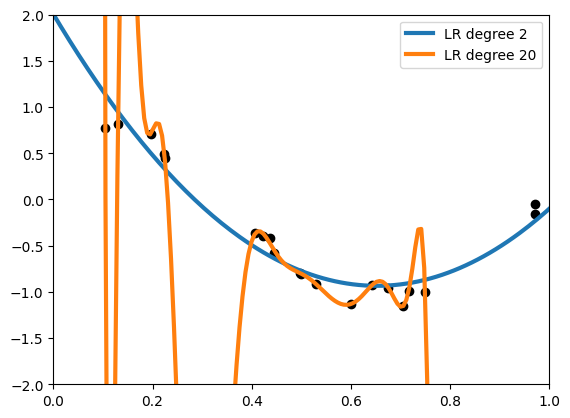

In [13]:
# prepare models
models = []
predicts = []
names=[]
models.append(('LR degree 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('LR degree 20', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression()) ))

x_plot = np.vstack(np.linspace(-3, 3, 1000))
for name, model in models:
    print(name)
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)
    
plt.plot(x, y, 'ok');
for i in range(len(models)):
    #print(i)
    plt.plot(x_plot, predicts[i],linewidth=3,label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
plt.legend()    
plt.show()    

# Zadanie 
Proszę wykonać 
* regresję dla wielomianów o stopniu **20**
* regresję (Lasso Regression) dla wielomianów o stopniu **20** oraz
   * alpha = 1 
   * alpha = 10 000 
   * alpha = 0.0001

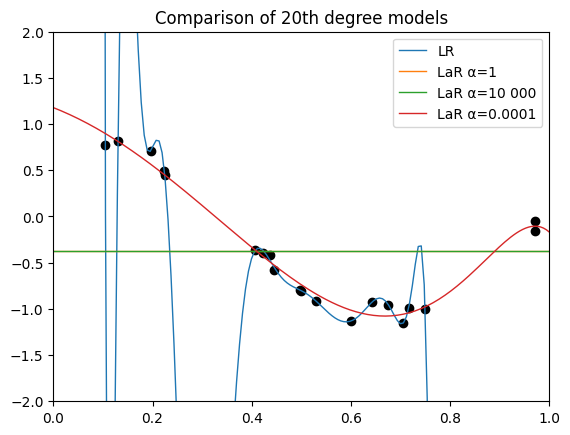

In [14]:
# prepare models
models = []
models.append(('LR', make_pipeline(PolynomialFeatures(20), linear_model.LinearRegression())))
models.append(('LaR α=1', make_pipeline(PolynomialFeatures(20), Lasso(alpha=1.0))))
models.append(('LaR α=10 000', make_pipeline(PolynomialFeatures(20), Lasso(alpha=10_000))))
models.append(('LaR α=0.0001', make_pipeline(PolynomialFeatures(20), Lasso(alpha=0.0001, max_iter=100_000))))

predicts = []
names = []
x_plot = np.vstack(np.linspace(-3, 3, 1000))

for name, model in models:
    model.fit(x, y)
    predicts.append(model.predict(x_plot))
    names.append(name)

# drawing
plt.plot(x, y, 'ok');
for i in range(len(models)):
    plt.plot(x_plot, predicts[i], linewidth=1, label=names[i])
    plt.xlim((0, 1))
    plt.ylim((-2, 2))

plt.title('Comparison of 20th degree models')
plt.legend()
plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr alpha.

In [15]:
def best_fit(x, y) -> tuple[Pipeline, int, float]:
    grid = GridSearchCV(
        make_pipeline(PolynomialFeatures(), Lasso()),
        param_grid={
            "polynomialfeatures__degree": range(1, 21),
            "lasso__alpha": [0.0001, 1, 10, 100, 1000]
        },
        cv=10,
        scoring="neg_mean_squared_error",
    )
    grid.fit(x,y)
    return grid.best_estimator_, grid.best_params_["polynomialfeatures__degree"], grid.best_params_["lasso__alpha"]

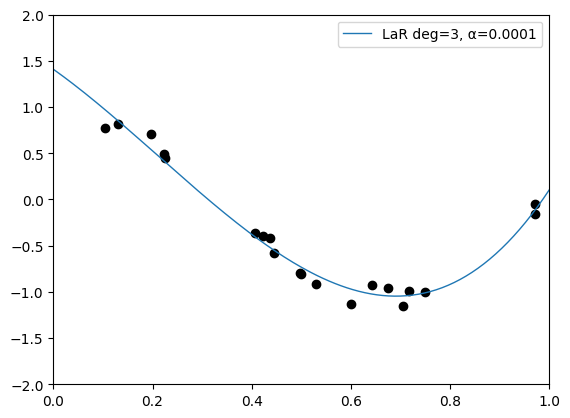

In [16]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model, deg, alpha = best_fit(x, y)

x_plot = np.vstack(np.linspace(-3, 3, 1000))
plt.plot(x, y, 'ok');

plt.plot(x_plot, model.predict(x_plot), linewidth=1, label=f'LaR deg={deg}, α={alpha:.4}')
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend()

plt.show()

# Zdanie 
Dobierz optymalny stopień wielomianu oraz parametr <tt>alpha</tt> za pomocą metody <tt>GridSearchCV</tt> dla danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

*  policz r_square score.

In [17]:
import pandas as pd
df_adv = pd.read_csv('https://raw.githubusercontent.com/przem85/bootcamp/master/statistics/Advertising.csv',
                     index_col=0)
X = df_adv[['TV', 'radio','newspaper']]
y = df_adv['sales']
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [18]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model, deg, alpha = best_fit(X, y)
r_squared = model.score(X, y)

print(f"Estimated parameters: degree={deg}, alpha={alpha:.4f}")
print(f"R^2: {model.score(X, y):.4f}")

Estimated parameters: degree=3, alpha=0.0001
R^2: 0.9917
